In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t,norm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-sales-data/Auto Sales data.csv


In [ ]:
df = pd.read_csv('/kaggle/input/auto-sales-data/Auto Sales data.csv',parse_dates=[5])

/tmp/ipykernel_43/265727799.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/kaggle/input/auto-sales-data/Auto Sales data.csv',parse_dates=[5])


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [ ]:
df.columns = map(str.lower, df.columns)

In [ ]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'days_since_lastorder', 'status', 'productline',
       'msrp', 'productcode', 'customername', 'phone', 'addressline1', 'city',
       'postalcode', 'country', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [ ]:
df['total_sale'] = df.quantityordered*df.priceeach

In [ ]:
df['year'] = df['orderdate'].dt.year
df['month'] = df['orderdate'].dt.month_name()
df['quarter'] = df['orderdate'].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [ ]:
df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,days_since_lastorder,status,productline,msrp,...,city,postalcode,country,contactlastname,contactfirstname,dealsize,total_sale,year,month,quarter
0,10107,30,95.70,2,2871.0,2018-02-24,828,Shipped,Motorcycles,95,...,NYC,10022,USA,Yu,Kwai,Small,2871.0,2018,February,2018-Q1
1,10121,34,81.35,5,2765.9,2018-05-07,757,Shipped,Motorcycles,95,...,Reims,51100,France,Henriot,Paul,Small,2765.9,2018,May,2018-Q2


In [ ]:
df.describe(include='all')

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,days_since_lastorder,status,productline,msrp,...,city,postalcode,country,contactlastname,contactfirstname,dealsize,total_sale,year,month,quarter
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747,2747,2747.000000,...,2747,2747,2747,2747,2747,2747,2747.000000,2747.000000,2747,2747
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,7,NaN,...,71,73,19,76,72,3,NaN,NaN,12,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shipped,Classic Cars,NaN,...,Madrid,28034,USA,Freyre,Diego,Medium,NaN,NaN,November,2019-Q4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2541,949,NaN,...,304,259,928,259,259,1349,NaN,NaN,589,562
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,NaN,NaN,100.691664,...,NaN,NaN,NaN,NaN,NaN,NaN,3553.047605,2018.822352,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,NaN,NaN,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,482.130000,2018.000000,NaN,NaN
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,NaN,NaN,68.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2204.350000,2018.000000,NaN,NaN
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,NaN,NaN,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3184.800000,2019.000000,NaN,NaN
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,NaN,NaN,124.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,4503.095000,2019.000000,NaN,NaN
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,NaN,NaN,214.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,14082.800000,2020.000000,NaN,NaN


In [ ]:
df.drop(columns=['contactlastname','contactfirstname'],inplace=True)

The first and last names of the customers are not needed.

In [ ]:
df.customername.value_counts()

customername
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: count, Length: 89, dtype: int64

In [ ]:
df.phone.value_counts()

phone
(91) 555 94 44      259
4155551450          180
03 9520 4555         55
40.67.8555           53
6175558555           51
                   ... 
2125551957           10
(071) 23 67 2555      8
6175558428            8
40.32.2555            7
3105552373            3
Name: count, Length: 88, dtype: int64

phone number is not needed for analysis.

In [ ]:
df.drop(columns=['phone'],inplace=True)

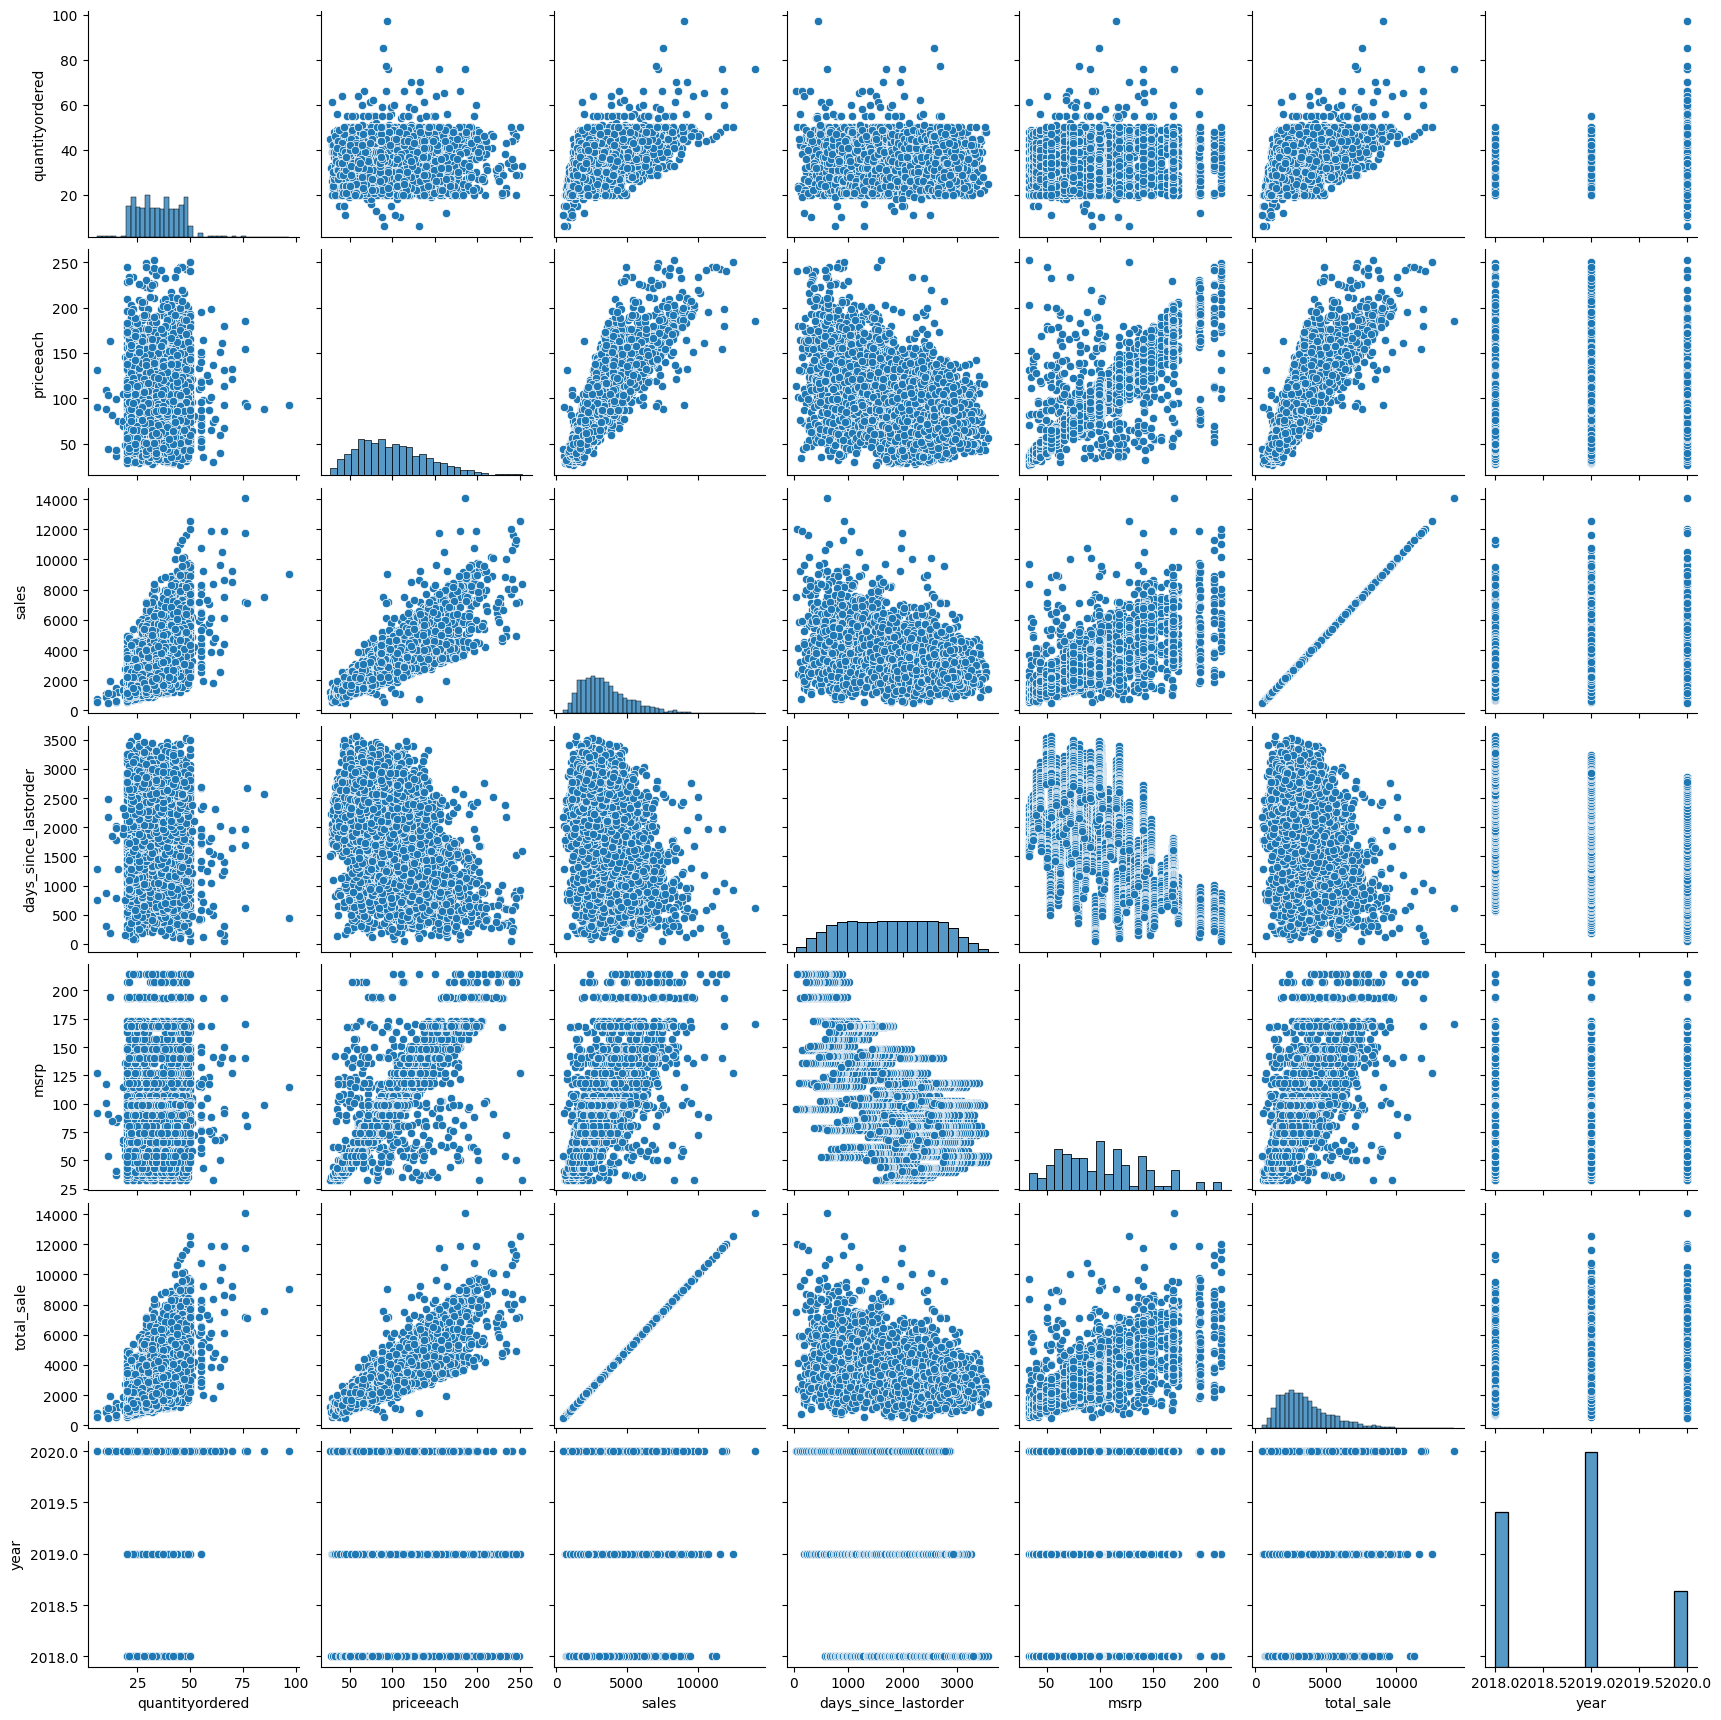

In [ ]:
sns.pairplot(df.drop(columns=['ordernumber','orderlinenumber']))

In [ ]:
df['quarter_only'] = df.orderdate.dt.to_period('Q').dt.strftime('Q%q')

Text(0.5, 1.0, 'Total Sales per Quarter')

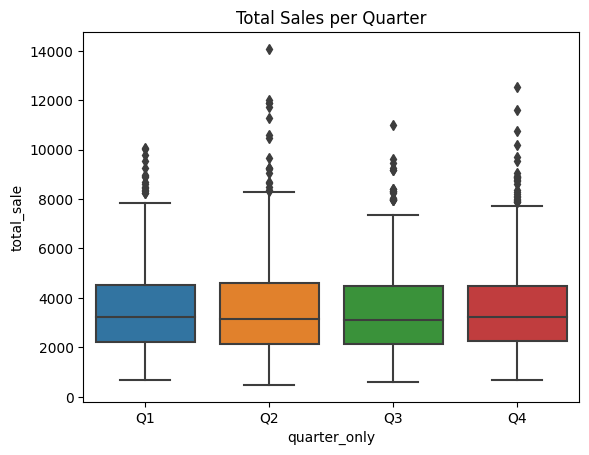

In [ ]:
sns.boxplot(x='quarter_only',y='total_sale', data=df)
plt.title('Total Sales per Quarter')

There are several outliers per quarter.

Text(0.5, 1.0, 'Median Total Sales per Quarter (in ascending order)')

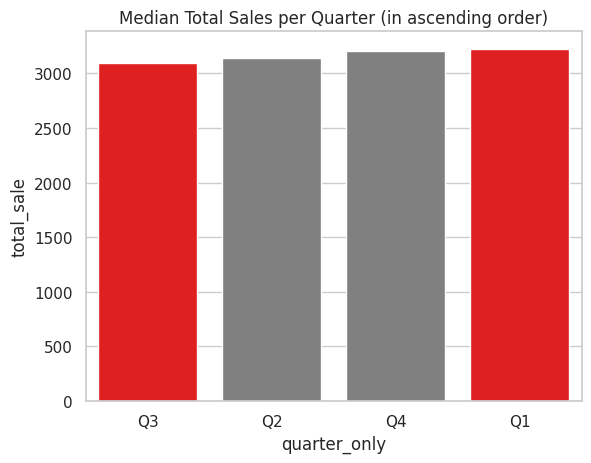

In [ ]:
sns.barplot(palette=['red','grey','grey','red'],errorbar=None,x='quarter_only',y='total_sale',data=df,estimator='median',order=df.groupby('quarter_only')['total_sale'].agg('median').sort_values().index)
plt.title('Median Total Sales per Quarter (in ascending order)')

First Quarter seems to have the best performance when using the median; Performing further analysis using the mean after removing outliers.

In [ ]:
from scipy.stats import zscore
zscores = zscore(df.total_sale)
df['total_sale'] = df.total_sale[zscores<=3]

<Axes: xlabel='quarter_only', ylabel='total_sale'>

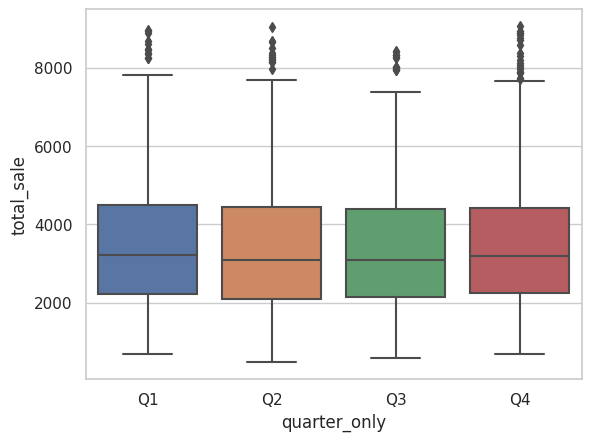

In [ ]:
sns.boxplot(x='quarter_only',y='total_sale', data=df)


there are still outliers present; segmenting by quarter then removing outliers for each quarter.

In [ ]:
q1 = df[df.quarter_only=='Q1']
q2 = df[df.quarter_only=='Q2']
q3 = df[df.quarter_only=='Q3']
q4 = df[df.quarter_only=='Q4']
q1.dropna(subset=['total_sale'],inplace=True)
q2.dropna(subset=['total_sale'],inplace=True)
q3.dropna(subset=['total_sale'],inplace=True)
q4.dropna(subset=['total_sale'],inplace=True)

/tmp/ipykernel_43/965608205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1.dropna(subset=['total_sale'],inplace=True)
/tmp/ipykernel_43/965608205.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2.dropna(subset=['total_sale'],inplace=True)
/tmp/ipykernel_43/965608205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3.dropna(subset=['total_sale'],inplace=True)
/tmp/ipykernel_43/965608205.py:8: SettingWithCopyWarning: 
A 

In [ ]:
q1.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,days_since_lastorder,status,productline,msrp,...,addressline1,city,postalcode,country,dealsize,total_sale,year,month,quarter,quarter_only
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Small,2871.00,2018,February,2018-Q1,Q1
7,10211,41,114.84,14,4708.44,2019-01-15,510,Shipped,Motorcycles,95,...,"25, rue Lauriston",Paris,75016,France,Medium,4708.44,2019,January,2019-Q1,Q1
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,...,636 St Kilda Road,Melbourne,3004,Australia,Medium,3965.66,2019,February,2019-Q1,Q1
20,10375,21,34.91,12,733.11,2020-02-03,139,Shipped,Motorcycles,95,...,"67, rue des Cinquante Otages",Nantes,44000,France,Small,733.11,2020,February,2020-Q1,Q1
21,10388,42,76.36,4,3207.12,2020-03-03,111,Shipped,Motorcycles,95,...,1785 First Street,New Bedford,50553,USA,Medium,3207.12,2020,March,2020-Q1,Q1


In [ ]:
zscore(q1['total_sale'])

0      -0.370356
7       0.739765
8       0.291001
20     -1.662000
21     -0.167284
          ...   
2731   -0.727274
2732   -1.384415
2743    0.298765
2744    1.168198
2745   -0.826406
Name: total_sale, Length: 633, dtype: float64

In [ ]:
zscores1 = zscore(q1.total_sale)
q1['total_sale'] = q1.total_sale[zscores1<3]

zscores2 = zscore(q2.total_sale)
q2['total_sale'] = q2.total_sale[zscores2<3]

zscores3 = zscore(q3.total_sale)
q3['total_sale'] = q3.total_sale[zscores3<3]

zscores4 = zscore(q4.total_sale)
q4['total_sale'] = q4.total_sale[zscores4<3]


/tmp/ipykernel_43/1512070516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1['total_sale'] = q1.total_sale[zscores1<3]
/tmp/ipykernel_43/1512070516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['total_sale'] = q2.total_sale[zscores2<3]
/tmp/ipykernel_43/1512070516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
q1.total_sale.head()

0     2871.00
7     4708.44
8     3965.66
20     733.11
21    3207.12
Name: total_sale, dtype: float64

joining the 4 quarters to make a new dataset.

In [ ]:
df2 = pd.concat([q1,q2,q3,q4],axis=0)

In [ ]:
df2.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,days_since_lastorder,status,productline,msrp,...,addressline1,city,postalcode,country,dealsize,total_sale,year,month,quarter,quarter_only
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Small,2871.00,2018,February,2018-Q1,Q1
7,10211,41,114.84,14,4708.44,2019-01-15,510,Shipped,Motorcycles,95,...,"25, rue Lauriston",Paris,75016,France,Medium,4708.44,2019,January,2019-Q1,Q1
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,...,636 St Kilda Road,Melbourne,3004,Australia,Medium,3965.66,2019,February,2019-Q1,Q1
20,10375,21,34.91,12,733.11,2020-02-03,139,Shipped,Motorcycles,95,...,"67, rue des Cinquante Otages",Nantes,44000,France,Small,733.11,2020,February,2020-Q1,Q1
21,10388,42,76.36,4,3207.12,2020-03-03,111,Shipped,Motorcycles,95,...,1785 First Street,New Bedford,50553,USA,Medium,3207.12,2020,March,2020-Q1,Q1


Text(0.5, 1.0, 'Q3 is the worst Quarter')

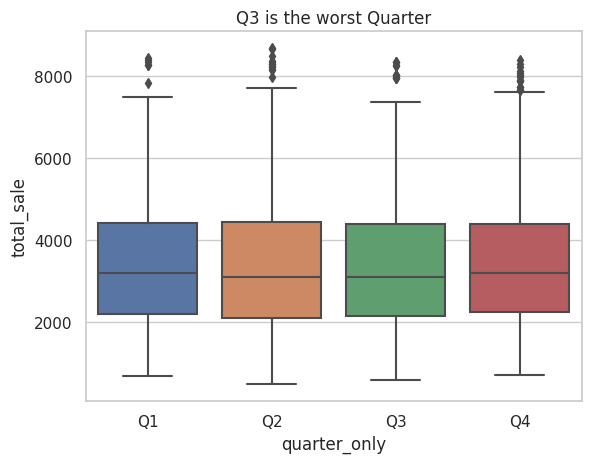

In [ ]:
sns.boxplot(x='quarter_only',y='total_sale', data=df2)
plt.title('Q3 is the worst Quarter')

Text(0.5, 1.0, 'Mean Of Total Sale per Quarter')

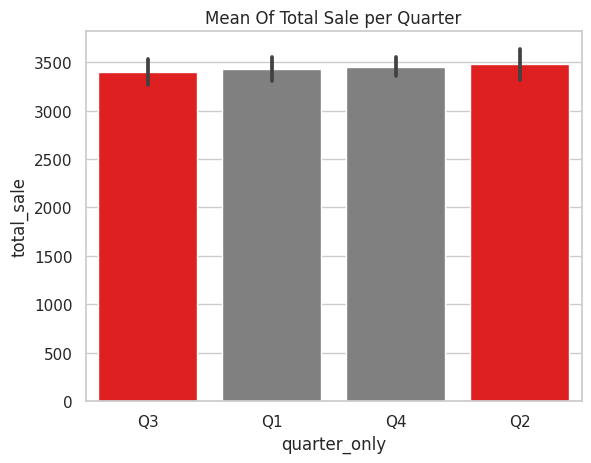

In [ ]:
sns.barplot(palette=['red','grey','grey','red'],x='quarter_only',y='total_sale',data=df2,estimator='mean',order=df2.groupby('quarter_only')['total_sale'].agg('mean').sort_values().index)
plt.title('Mean Of Total Sale per Quarter')

As a result of the outliers present, the quarter with the highest mean is Quarter 2. The median is more reliable as it is not influenced by outliers so the best quarter seems to Quarter 1 and the worst is Quarter 3.

Text(2019, 3550, 'Increasing trend of Total Sales')

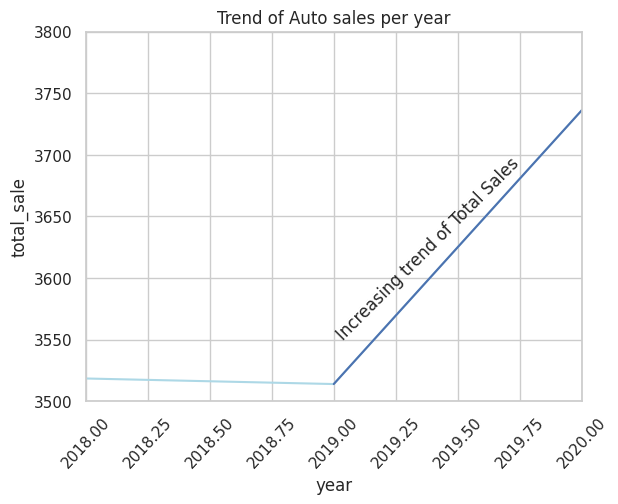

In [ ]:
sns.set_theme(style='whitegrid')
sns.lineplot(x=df.year,y=df.total_sale, errorbar=None, color='lightblue')
sns.lineplot(x=df.year[df.year>=2019],y=df.total_sale, errorbar=None)
plt.title('Trend of Auto sales per year')
plt.xticks(rotation=47)
plt.axis([2018,2020,3500,3800])
plt.annotate('Increasing trend of Total Sales',(2019,3550),rotation=45)

Text(0.5, 1.0, 'Total Sales per month')

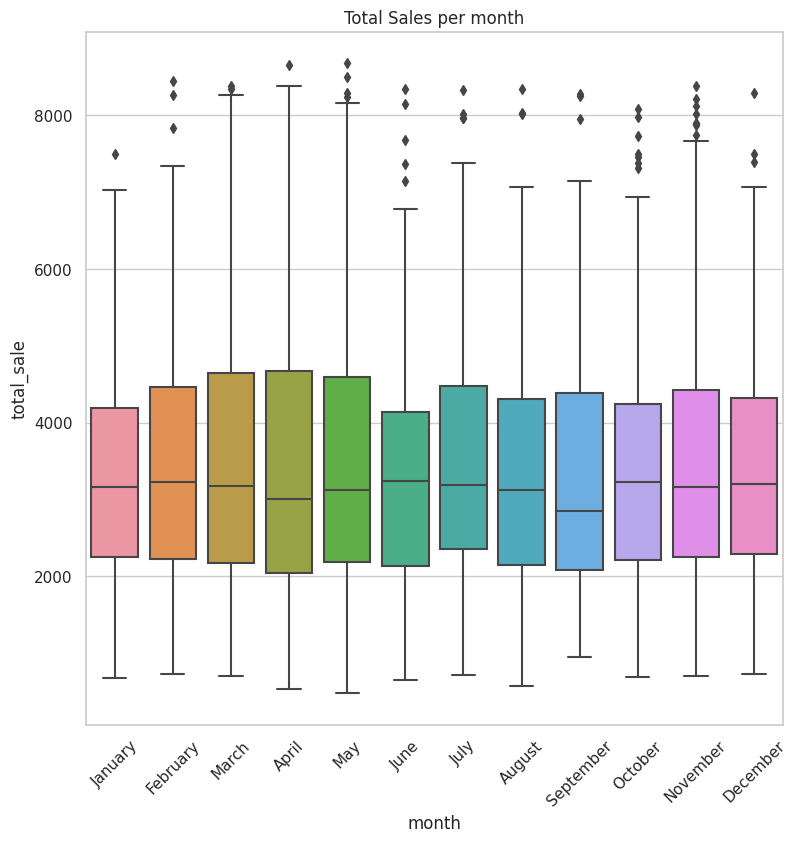

In [ ]:
plt.figure(figsize=(9,9))
sns.boxplot(x='month',y='total_sale',data=df2, order=['January','February','March','April','May','June','July','August','September',
                                                     'October','November','December'])
plt.xticks(rotation=45)
plt.title('Total Sales per month')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'September'),
  Text(1, 0, 'April'),
  Text(2, 0, 'August'),
  Text(3, 0, 'May'),
  Text(4, 0, 'November'),
  Text(5, 0, 'March'),
  Text(6, 0, 'July'),
  Text(7, 0, 'December'),
  Text(8, 0, 'January'),
  Text(9, 0, 'October'),
  Text(10, 0, 'February'),
  Text(11, 0, 'June')])

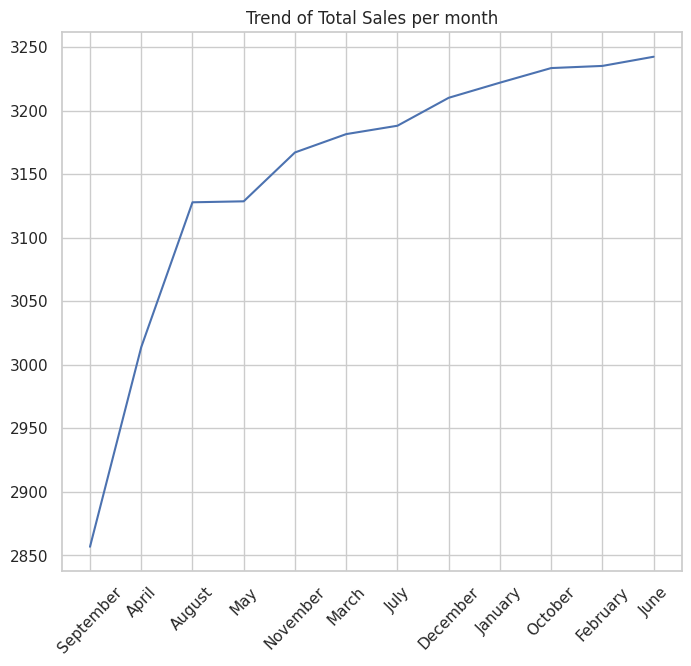

In [ ]:
plt.figure(figsize=(8,7))
ordered_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
by_month = df.groupby('month')['total_sale'].agg('median').sort_values()
plt.plot(by_month.index,by_month.values)
plt.title('Trend of Total Sales per month')
plt.xticks(rotation=46)